In [16]:
from photutils.utils import CutoutImage
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import simple_norm


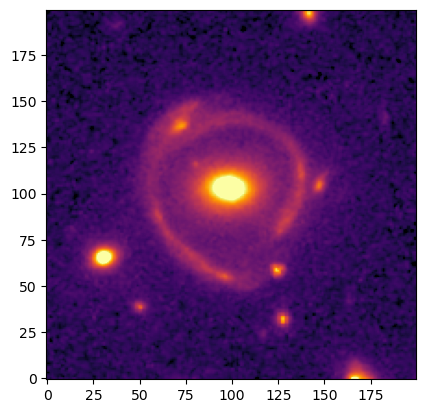

In [17]:
f=fits.open('final_96_drz.fits') 
observed_img = CutoutImage(f[1].data,[1070,1230],[200,200])
#save("cutout238b.npy",observed_img)

norm = simple_norm(observed_img, 'sqrt', percent=99.)
plt.imshow(observed_img, norm=norm, origin='lower', cmap='inferno')
#plt.colorbar()
plt.savefig("observed.png",transparent=True)

In [18]:
exp_time=f[0].header["EXPTIME"]
deltaPix = f[0].header["D002SCAL"]
numPix = np.shape(observed_img)[0]
extent = (-numPix/2*deltaPix, numPix/2*deltaPix, -numPix/2*deltaPix, numPix/2*deltaPix)

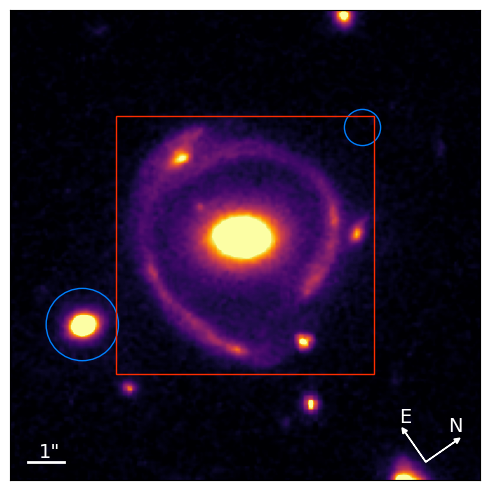

In [48]:
fig,ax = plt.subplots(1,1,figsize = (5,5), sharex=False, sharey=False)

#observed_img[observed_img<0]=0
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

obs_ax = ax.imshow(observed_img,cmap='inferno',extent=extent, origin = 'lower',vmin=0,vmax=0.5)#norm=norm)

x=-6
y=-6
ax.plot([x,x+1],[y,y],linewidth=2,color='w')
ax.text(x+0.6, y+0.25, '1"', fontsize=14, color='white', ha='center', va='center',)

from matplotlib.patches import Circle
from matplotlib.patches import Rectangle

x_center = -4.5
y_center = -2.2
radius = 1
circle = Circle((x_center, y_center), radius, color='#0080FF', fill=False)
ax.add_patch(circle)

x_center = 100*deltaPix/2
y_center = 100*deltaPix/2
radius = 0.5
circle = Circle((x_center, y_center), radius, color='#0080FF', fill=False)
ax.add_patch(circle)

x = -110*deltaPix/2
y = -110*deltaPix/2
rectangle = Rectangle((x, y), 110*deltaPix, 110*deltaPix, color='#ff2d00', fill=False)
ax.add_patch(rectangle)

x = 5
y = -6
psi = f[1].header['ORIENTAT']*3.14/180

dx = np.sin(psi)
dy = np.cos(psi)
ax.arrow(x,y,dx,dy,width=0.01,color='w',head_length=3*0.05, head_width=3*0.05)
ax.text(x+dx, y+dy+0.4, 'N', fontsize=14, color='white', ha='center', va='center',)

dx = -np.cos(psi)
dy = np.sin(psi)
ax.arrow(x,y,dx,dy,width=0.01,color='w',head_length=3*0.05, head_width=3*0.05)
ax.text(x+dx, y+dy+0.4, 'E', fontsize=14, color='white', ha='center', va='center',)

plt.tight_layout()
# Show the plot
#plt.savefig('/global/homes/d/davalv03/HST-57/plots-HST-57/observed_image.png')